In [1]:

>>> import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns # a visualization library from matplotlib
from math import sin, cos, sqrt, atan2, radians
import json
import pprint
import ast

In [2]:
Course_df = pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/16-17-spring-course.xlsx") #course list
TA_df =pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/16-17-spring-ta.xlsx") # TA preference list

In [3]:
n_rows, n_columns = Course_df.shape  # get the shape of dataframe
print("Shape of course dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of course dataframe is
number of rows: 106, number of columns: 9


In [4]:
n_rows, n_columns = TA_df.shape  # get the shape of dataframe
print("Shape of TA dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of TA dataframe is
number of rows: 286, number of columns: 11


## Brief preview of both TA and Course preference lists¶

In [5]:
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
0,NaN,NaN,NaN,NaN,Grad Program,NaN,NaN,NaN,NaN
1,20036.0,BIO 301,0,Intro. to Molecular Biology,NaN,20.0,15.0,3-Sinem Usluer ( 66155 ) (10 / 10)\n3-Tandac F...,"Biran Musul (66096, BIO, 10 hours)\nYunus Akko..."
2,20038.0,BIO 303,0,Genetics,NaN,20.0,20.0,2-Sinem Usluer ( 66155 ) (10 / 10)\n3-Emir Art...,"Seval Kilic (65999, BIO, 10 hours)\nOzlem Yedi..."
3,20040.0,BIO 310,0,Introduction to Bioinformatics,NaN,20.0,10.0,1-Tandac Furkan Guclu ( 65917 ) (20 / 20)\n3-B...,"Tandac Furkan Guclu (65917, BIO, 20 hours)"
4,20042.0,BIO 322,0,Biochemistry II,NaN,20.0,15.0,1-Sinem Usluer ( 66155 ) (10 / 10)\n1-Ronay Ce...,"Sevde Nur Karatas (66156, BIO, 10 hours)\nSine..."


In [6]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,18282,Abdolali \nKhalili Sadaghiani,PHD,ME,20,20,1- ME 309 (30 / 25)\n2- MATH 101 (150 / 235)\n...,ME 309,20201.0,NaN,NaN
1,24375,Abdul Rahman \nDabbour,MS,ME,20,20,1- NS 101 (185 / 180)\n2- MATH 203 (105 / 240)...,MATH 203,20764.0,NaN,NaN
2,14277,Abdurrahman \nBurak,MS,EE,10,10,1- EE 308 (30 / 15)\n2- EE 200 (30 / 30)\n3- E...,EE 200,20877.0,NaN,NaN
3,20205,Adnan \nTaşdemir,PHD,MAT,10,10,1- ENS 491 (80 / 60)\n2- ENS 205 (180 / 150)\n...,ENS 205,20778.0,NaN,NaN
4,21965,Ahmad Reza\nMotezakker,MS,ME,10,10,1- ME 309 (30 / 25)\n2- MATH 101 (150 / 235)\n...,IF 401,21209.0,NaN,NaN


## Data types for TA & Courses dataframes¶ 

In [7]:
Course_df.dtypes

CRN                          float64
Name                          object
Section                       object
Title                         object
Preferred                     object
Hours Assigned               float64
Hours Requested              float64
Requesting Teaching Grads     object
Assigned Teaching Grads       object
dtype: object

In [8]:
TA_df.dtypes

Student ID             int64
Name                  object
Degree                object
Program               object
Hours Assigned         int64
Hours Requested        int64
Requested Courses     object
Assigned Course 1     object
CRN 1                float64
Assigned Course 2     object
CRN 2                float64
dtype: object

## Dealing with Dirty Data

In [9]:
# TA dataframe first
TA_df = TA_df.fillna(0) # NaN values are cumbersome values. Change all to 0
TA_df['CRN 1'] = TA_df['CRN 1'].astype('int64') # CRN values are actually integer values. However , they are float in the file
# Change the CRN 1 column value type to int as expected
TA_df['CRN 2'] = TA_df['CRN 2'].astype('int64')
#Change the CRN 2 column value type to int as expected
TA_df['Name'] = TA_df['Name'].replace('\n',' ', regex=True)
TA_df['Assigned Course 2'] = TA_df['Assigned Course 2'].replace('\n',' ', regex=True)

In [10]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,18282,Abdolali Khalili Sadaghiani,PHD,ME,20,20,1- ME 309 (30 / 25)\n2- MATH 101 (150 / 235)\n...,ME 309,20201,0,0
1,24375,Abdul Rahman Dabbour,MS,ME,20,20,1- NS 101 (185 / 180)\n2- MATH 203 (105 / 240)...,MATH 203,20764,0,0
2,14277,Abdurrahman Burak,MS,EE,10,10,1- EE 308 (30 / 15)\n2- EE 200 (30 / 30)\n3- E...,EE 200,20877,0,0
3,20205,Adnan Taşdemir,PHD,MAT,10,10,1- ENS 491 (80 / 60)\n2- ENS 205 (180 / 150)\n...,ENS 205,20778,0,0
4,21965,Ahmad Reza Motezakker,MS,ME,10,10,1- ME 309 (30 / 25)\n2- MATH 101 (150 / 235)\n...,IF 401,21209,0,0


In [11]:
# Course dataframes turn
Course_df = Course_df.fillna(0) # replace all NaN values with 0
Course_df = Course_df.drop(Course_df.index[0])
Course_df['CRN'] = Course_df['CRN'].astype('int64')
Course_df['Hours Assigned'] = Course_df['Hours Assigned'].astype('int64')
Course_df['Hours Requested'] = Course_df['Hours Requested'].astype('int64')
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
1,20036,BIO 301,0,Intro. to Molecular Biology,0,20,15,3-Sinem Usluer ( 66155 ) (10 / 10)\n3-Tandac F...,"Biran Musul (66096, BIO, 10 hours)\nYunus Akko..."
2,20038,BIO 303,0,Genetics,0,20,20,2-Sinem Usluer ( 66155 ) (10 / 10)\n3-Emir Art...,"Seval Kilic (65999, BIO, 10 hours)\nOzlem Yedi..."
3,20040,BIO 310,0,Introduction to Bioinformatics,0,20,10,1-Tandac Furkan Guclu ( 65917 ) (20 / 20)\n3-B...,"Tandac Furkan Guclu (65917, BIO, 20 hours)"
4,20042,BIO 322,0,Biochemistry II,0,20,15,1-Sinem Usluer ( 66155 ) (10 / 10)\n1-Ronay Ce...,"Sevde Nur Karatas (66156, BIO, 10 hours)\nSine..."
5,20044,BIO 330,0,Environmental Plant Biology,0,15,10,1-Babar Hussain ( 65960 ) (10 / 10)\n2-Raheela...,"Kadriye Kahraman (66081, BIO, 10 hours)\nCevza..."


## How many TA's requested for each course ?

In [12]:
for courses in range(1,n_rows) :
    data = Course_df.at[courses,'Requesting Teaching Grads'].splitlines() 
    print(Course_df.at[courses,'Name'] , "requested" ,len(data),"TA's")

BIO 301 requested 3 TA's
BIO 303 requested 6 TA's
BIO 310 requested 3 TA's
BIO 322 requested 3 TA's
BIO 330 requested 5 TA's
BIO 335 requested 4 TA's
BIO 370 requested 4 TA's
BIO 415 requested 3 TA's
BIO 467 requested 7 TA's
CHEM 202 requested 2 TA's
CHEM 302 requested 8 TA's
CS 201 requested 25 TA's
CS 204 requested 8 TA's
CS 210 requested 7 TA's
CS 301 requested 6 TA's
CS 305 requested 4 TA's
CS 306 requested 5 TA's
CS 308 requested 2 TA's
CS 310 requested 5 TA's
CS 401 requested 4 TA's
CS 404 requested 3 TA's
CS 406 requested 3 TA's
CS 407 requested 3 TA's
CS 409 requested 3 TA's
CS 432 requested 5 TA's
CS 439 requested 2 TA's
CS 450 requested 2 TA's
EE 200 requested 6 TA's
EE 202 requested 6 TA's
EE 302 requested 2 TA's
EE 306 requested 4 TA's
EE 308 requested 4 TA's
EE 310 requested 4 TA's
EE 312 requested 7 TA's
EE 314 requested 1 TA's
EE 404 requested 2 TA's
EE 406 requested 1 TA's
ELAE 1 requested 1 TA's
ENS 201 requested 3 TA's
ENS 205 requested 24 TA's
ENS 206 requested 11 TA

KeyError: 106

In [13]:
for TA in range(1,110) :
    if Course_df.at[TA,'Assigned Teaching Grads'] != "None" :
        data = Course_df.at[TA,'Assigned Teaching Grads'].splitlines()
        print(Course_df.at[TA,'Name'] , "assigned" ,len(data),"TA's")
    else :
        print(Course_df.at[TA,'Name'] , "assigned" , 0,"TA's")

BIO 301 assigned 2 TA's
BIO 303 assigned 2 TA's
BIO 310 assigned 1 TA's
BIO 322 assigned 2 TA's
BIO 330 assigned 2 TA's
BIO 335 assigned 2 TA's
BIO 370 assigned 1 TA's
BIO 415 assigned 2 TA's
BIO 467 assigned 1 TA's
CHEM 202 assigned 2 TA's
CHEM 302 assigned 2 TA's
CS 201 assigned 13 TA's
CS 204 assigned 6 TA's
CS 210 assigned 3 TA's
CS 301 assigned 2 TA's
CS 305 assigned 2 TA's
CS 306 assigned 1 TA's
CS 308 assigned 2 TA's
CS 310 assigned 1 TA's
CS 401 assigned 1 TA's
CS 404 assigned 2 TA's
CS 406 assigned 1 TA's
CS 407 assigned 1 TA's
CS 409 assigned 2 TA's
CS 432 assigned 2 TA's
CS 439 assigned 1 TA's
CS 450 assigned 0 TA's
EE 200 assigned 3 TA's
EE 202 assigned 2 TA's
EE 302 assigned 1 TA's
EE 306 assigned 1 TA's
EE 308 assigned 2 TA's
EE 310 assigned 1 TA's
EE 312 assigned 2 TA's
EE 314 assigned 0 TA's
EE 404 assigned 1 TA's
EE 406 assigned 1 TA's
ELAE 1 assigned 0 TA's
ENS 201 assigned 2 TA's
ENS 205 assigned 14 TA's
ENS 206 assigned 5 TA's
ENS 208 assigned 6 TA's
ENS 209 assigne

KeyError: 106

## Number of Ta's for each program¶

In [15]:
top_programs = TA_df['Program'].value_counts()
print(top_programs)

MAT     65
IE      39
BIO     37
ME      36
CS      30
EE      29
MATH    17
MFE     17
PHYS    16
Name: Program, dtype: int64


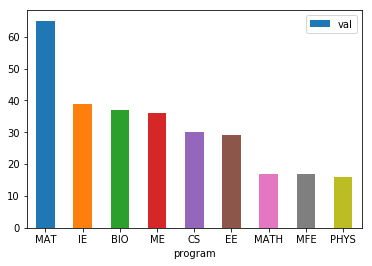

In [16]:
df = pd.DataFrame({'program':['MAT', 'IE', 'BIO','ME','CS','EE','MATH','MFE','PHYS'], 'val':[65, 39, 37,36,30,29,17,17,16]})
ax = df.plot.bar(x='program', y='val', rot=0)